## 数据分析

In [66]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import LabelEncoder 

In [67]:
operation_TRAIN = pd.read_csv("../data/operation_TRAIN.csv")
operation_TRAIN = operation_TRAIN.drop_duplicates("UID")

In [68]:
operation_TRAIN.head(2)

,UID,day,mode,success,time,os,version,device1,device2,device_code1,device_code2,device_code3,mac1,mac2,ip1,ip2,wifi,geo_code,ip1_sub,ip2_sub
0,10035,30,c8741ce15ceac2a4,1.0,17:51:50,102,7.0.9,49dd36968dbfadda,OPPO R11,ecb58082e0e9b8e2,00fa2e4ba95605ef,NaN,NaN,a8dc52f65085212e,55dd8936655c86f6,NaN,NaN,wskx,e58e48fb9215116e,NaN
1,16264,16,20a91b45ef8f8221,1.0,08:36:00,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fc7fc47d6c93f554,NaN,NaN,NaN,3502c553ea2ac187


In [25]:
feature = operation_TRAIN.drop("UID", axis=1).columns
con_feature = ["day"]
dis_feature = feature.drop(con_feature).values.tolist()

### 数据one-hot

In [75]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import LabelEncoder
operation_TRAIN = pd.read_csv("../data/operation_TRAIN.csv")
transaction_TRAIN = pd.read_csv("../data/transaction_TRAIN.csv")
tag_TRAIN = pd.read_csv("../data/tag_TRAIN.csv")                                                          
operation_TRAIN = operation_TRAIN.drop_duplicates("UID", keep="last")
transaction_TRAIN = transaction_TRAIN.drop_duplicates("UID", keep="last")
train_X = pd.merge(operation_TRAIN, transaction_TRAIN, on="UID", how="outer")
train = pd.merge(train_X, tag_TRAIN, on="UID", how="left")
train = train.sort_values("UID")
operation_round1 = pd.read_csv("../data/operation_round1.csv")
transaction_round1 = pd.read_csv("../data/transaction_round1.csv")                                                                                                                      
operation_round1 = operation_round1.drop_duplicates(["UID"], keep="last")
transaction_round1 = transaction_round1.drop_duplicates(["UID"], keep="last")                                                              
test_C = pd.merge(operation_round1, transaction_round1, on="UID", how="outer")
test_C = test_C.sort_values("UID")

test_C["Tag"] = -1
data = pd.concat([train, test_C])

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

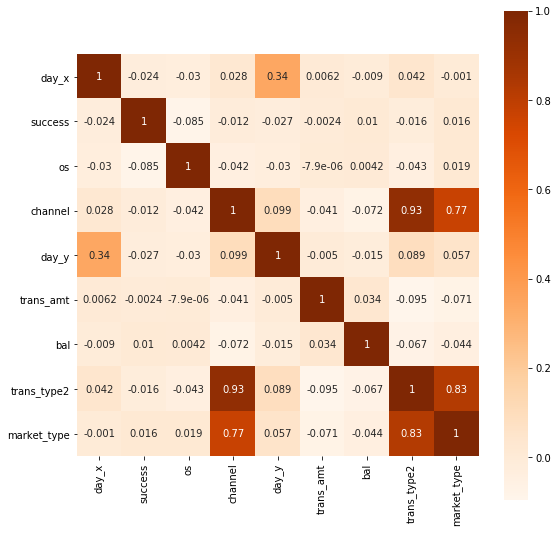

In [68]:
train = train.drop(["UID", "Tag"], axis=1)
train_data = train.corr()
plt.subplots(figsize=(9,9))
# cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(train_data, annot=True, vmax=1, square=True, cmap="Oranges")
plt.show()

In [ ]:
print("开始one-hot...")
feature = data.columns.drop(["UID", "Tag"])
col_feature = ["day_x", "day_y", "bal", "trans_amt"]
dis_feature = feature.drop(col_feature).values.tolist()
for col in dis_feature:
    print("this is feature:", col)
    onehot_feats = pd.get_dummies(data[col], prefix=col)
    data.drop([col], axis=1, inplace=True)
    data = pd.concat([data, onehot_feats], axis=1)

开始one-hot...
this is feature: mode
this is feature: success
this is feature: time_x
this is feature: os
this is feature: version
this is feature: device1_x
this is feature: device2_x
this is feature: device_code1_x
this is feature: device_code2_x
this is feature: device_code3_x
this is feature: mac1_x
this is feature: mac2
this is feature: ip1_x
this is feature: ip2
this is feature: wifi
this is feature: geo_code_x
this is feature: ip1_sub_x
this is feature: ip2_sub
this is feature: channel
this is feature: time_y
this is feature: amt_src1


In [39]:
test_C["Tag"] = -1
data = pd.concat([train, test_C])
data["time_x"] = data["time_x"].fillna(value="00:00:00")
data["time_y"] = data["time_y"].fillna(value="00:00:00")
data["day_x"] = data["day_x"].fillna(value=0)
data["day_y"] = data["day_y"].fillna(value=30)
data = data.fillna(value=-99999)

In [45]:
feature = data.columns.drop(["UID", "Tag"])
col_feature = ["day_x", "day_y", "bal", "trans_amt"]
dis_feature = feature.drop(col_feature).values.tolist()

for col in dis_feature:
    lbl = preprocessing.LabelEncoder()
    test_C[col] = lbl.fit_transform(list(test_C[col].values))

In [46]:
enc = OneHotEncoder()
enc.fit(test_C[["mode", "os"]])
test_C = pd.concat([test_C, pd.DataFrame(enc.transform(test_C[["mode", "os"]]).toarray())], axis=1)

In [26]:
feature = train.drop(["UID", "Tag"], axis=1).columns
con_feature = ["day_x", "day_y"]
dis_feature = feature.drop(con_feature).values.tolist()

In [27]:
for col in dis_feature:
    lbl = preprocessing.LabelEncoder()
    train[col] = lbl.fit_transform(list(train[col].values))


In [29]:
train.head(2)

,UID,day_x,mode,success,time_x,os,version,device1_x,device2_x,device_code1_x,...,bal,amt_src2,acc_id2,acc_id3,geo_code_y,trans_type2,market_code,market_type,ip1_sub_y,Tag
9064,10000,13.0,45,1,5372,2,12,605,297,7775,...,0,54,1552,1567,2,3,171,5620,902,1
11787,10001,7.0,42,1,6787,1,7,36,251,7023,...,1020,55,1552,1567,1372,0,171,7717,974,0


In [30]:
enc = OneHotEncoder()
enc.fit(train[["mode", "os"]])
train = pd.concat([train, pd.DataFrame(enc.transform(train[["mode", "os"]]).toarray())], axis=1)

In [31]:
train.head(2)

,UID,day_x,mode,success,time_x,os,version,device1_x,device2_x,device_code1_x,...,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507
0,19923,20.0,44,1,3373,1,14,752,703,6301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20534,29.0,55,1,3452,1,14,36,560,2405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
operation_TRAIN.head(2)

,UID,day,mode,success,time,os,version,device1,device2,device_code1,...,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775
0,10035.0,30.0,46.0,1.0,7900.0,1.0,19.0,267.0,502.0,7208.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16264.0,16.0,5.0,1.0,1146.0,5.0,20.0,886.0,823.0,7757.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
for col in dis_feature:
    lbl = preprocessing.LabelEncoder()
    operation_TRAIN[col] = lbl.fit_transform(list(operation_TRAIN[col].values))

In [27]:
operation_TRAIN.head(2)

,UID,day,mode,success,time,os,version,device1,device2,device_code1,device_code2,device_code3,mac1,mac2,ip1,ip2,wifi,geo_code,ip1_sub,ip2_sub
0,10035,30,46,1,7900,1,19,267,502,7208,33,2462,745,2721,3214,605,3264,1237,6444,589
1,16264,16,5,1,1146,5,20,886,823,7757,7506,2462,745,4103,9742,599,3264,0,7134,145


In [66]:
operation_TRAIN.shape

(11979, 20)

In [ ]:
mode_ohe = OneHotEncoder(sparse=False).fit_transform(mode_label.reshape((-1,1)))

In [ ]:
mode_label= LabelEncoder().fit_transform(operation_TRAIN[dis_feature])

In [67]:
mode_ohe = OneHotEncoder(sparse=False).fit_transform(mode_label.reshape((-1,1)))

# EDA

In [2]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import os

In [3]:
operation_TRAIN = pd.read_csv("../data/operation_TRAIN.csv")
operation_TRAIN.head(2)

,UID,day,mode,success,time,os,version,device1,device2,device_code1,device_code2,device_code3,mac1,mac2,ip1,ip2,wifi,geo_code,ip1_sub,ip2_sub
0,10035,30,c8741ce15ceac2a4,1.0,17:51:50,102,7.0.9,49dd36968dbfadda,OPPO R11,ecb58082e0e9b8e2,00fa2e4ba95605ef,NaN,NaN,a8dc52f65085212e,55dd8936655c86f6,NaN,NaN,wskx,e58e48fb9215116e,NaN
1,16264,16,20a91b45ef8f8221,1.0,08:36:00,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fc7fc47d6c93f554,NaN,NaN,NaN,3502c553ea2ac187


Text(0.5,1,'miss_rate_os')

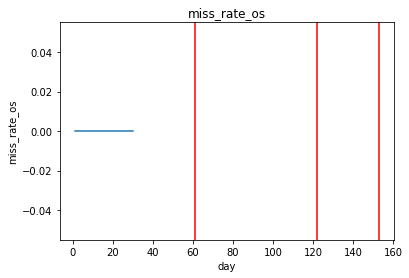

In [4]:
p = "os"
a = pd.DataFrame(operation_TRAIN.groupby("day")[p].apply(lambda x: sum(pd.isnull(x))) / operation_TRAIN.groupby("day")["day"].count()).reset_index()
a.columns = ["day", p]
fig = plt.figure()
ax = fig.add_subplot(1, 1,1)
plt.plot(a["day"], a[p])
plt.axvline(61, color="r")
plt.axvline(122, color="r")
plt.axvline(153, color="r")
plt.xlabel("day")
plt.ylabel("miss_rate_"+p)
plt.title("miss_rate_"+p)

In [5]:
operation_TRAIN = pd.read_csv("../data/operation_TRAIN.csv")
transaction_TRAIN = pd.read_csv("../data/transaction_TRAIN.csv")
tag_TRAIN = pd.read_csv("../data/tag_TRAIN.csv")                                                          
operation_TRAIN = operation_TRAIN.drop_duplicates("UID", keep="last")
transaction_TRAIN = transaction_TRAIN.drop_duplicates("UID", keep="last")
train_X = pd.merge(operation_TRAIN, transaction_TRAIN, on="UID", how="outer")
train = pd.merge(train_X, tag_TRAIN, on="UID", how="left")
train = train.sort_values("UID")

In [6]:
train["day_sub"] = train["day_y"] - train["day_x"]

In [7]:
train.head(2)

,UID,day_x,mode,success,time_x,os,version,device1_x,device2_x,device_code1_x,...,amt_src2,acc_id2,acc_id3,geo_code_y,trans_type2,market_code,market_type,ip1_sub_y,Tag,day_sub
9064,10000,13.0,c8741ce15ceac2a4,1.0,14:20:56,103.0,7.0.5,aca4977fbe8741e1,IPHONE 5,NaN,...,9a8ee16bde15e38a,NaN,NaN,NaN,105.0,NaN,NaN,1e3ea9498c461cbf,1,13.0
11787,10001,7.0,b501fa4fc58206b9,1.0,16:12:56,102.0,6.6.2,09baf2f39bc3dc86,HUAWEI GRA-CL00,e56819f72c9b7860,...,9fefed0a981dcb7a,NaN,NaN,wssu,102.0,NaN,NaN,20a23941af66c253,0,23.0


In [11]:
train_pos_sum = train["Tag"][train["Tag"] == 1].count()
train_neg_sum = train["Tag"][train["Tag"] == 0].count()
print("train.shape:", train.shape)
print("train_pos:", train_pos_sum)
print("train_neg:", train_neg_sum)

train.shape: (13422, 47)
train_pos: 1528
train_neg: 11894


In [18]:
train_pos = train[train["Tag"] == 0].groupby(["success"]).count()

In [19]:
train_pos

,UID,day_x,mode,time_x,os,version,device1_x,device2_x,device_code1_x,device_code2_x,...,bal,amt_src2,acc_id2,acc_id3,geo_code_y,trans_type2,market_code,market_type,ip1_sub_y,Tag
success,,,,,,,,,,,,,,,,,,,,,
0.0,559,559,559,559,559,477,478,381,376,359,...,542,353,71,69,469,498,64,64,503,559
1.0,9356,9356,9356,9356,9356,8727,8744,7649,7062,6882,...,9234,6006,1079,1081,7690,8317,1174,1174,8393,9356


In [2]:
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb


operation_TRAIN = pd.read_csv("../data/operation_TRAIN.csv")
transaction_TRAIN = pd.read_csv("../data/transaction_TRAIN.csv")
tag_TRAIN = pd.read_csv("../data/tag_TRAIN.csv")                                                          
operation_TRAIN = operation_TRAIN.drop_duplicates("UID", keep="last")
transaction_TRAIN = transaction_TRAIN.drop_duplicates("UID", keep="last")
train_X = pd.merge(operation_TRAIN, transaction_TRAIN, on="UID", how="outer")
train = pd.merge(train_X, tag_TRAIN, on="UID", how="left")
train = train.sort_values("UID")
operation_round1 = pd.read_csv("../data/operation_round1.csv")
transaction_round1 = pd.read_csv("../data/transaction_round1.csv")                                                                                                                      
operation_round1 = operation_round1.drop_duplicates(["UID"], keep="last")
transaction_round1 = transaction_round1.drop_duplicates(["UID"], keep="last")                                                              
test_C = pd.merge(operation_round1, transaction_round1, on="UID", how="outer")
test_C = test_C.sort_values("UID")

del operation_TRAIN
del transaction_TRAIN
del tag_TRAIN
del operation_round1
del transaction_round1


In [3]:
test_C["Tag"] = -1
data = pd.concat([train, test_C])

data["time_x"] = data["time_x"].fillna(value="00:00:00")
data["time_y"] = data["time_y"].fillna(value="00:00:00")
data["day_x"] = data["day_x"].fillna(value=0)
data["day_y"] = data["day_y"].fillna(value=30)
data = data.fillna(value=-99999)

data["hour_x"] = data.time_x.apply(lambda  x: x.split(":")[0])
data["minutes_x"] = data.time_x.apply(lambda  x: x.split(":")[1])
data["hour_y"] = data.time_y.apply(lambda  x: x.split(":")[0])
data["minutes_y"] = data.time_y.apply(lambda  x: x.split(":")[1])

data["day_y"] = data["day_y"] + 30
data["day_sub"] = data["day_y"] - data["day_x"]
data["hour_sub"] = (data["hour_y"].astype(int) +24) - data["hour_x"].astype(int)
data["minutes_sub"] = (data["minutes_y"].astype(int) +60) - data["minutes_x"].astype(int)
data["amt_bal_sum"] = data["trans_amt"] + data["bal"]


In [4]:
feature = data.columns.drop(["UID", "Tag"])
col_feature = ["day_x", "day_y","day_sub", "hour_sub", "minutes_sub", "bal", "trans_amt"]
dis_feature = feature.drop(col_feature).values.tolist()

for col in dis_feature:
    lbl = preprocessing.LabelEncoder()
    data[col] = lbl.fit_transform(list(data[col].values))
 

In [1]:
# print("开始one-hot...")
# feature = data.columns.drop(["UID", "Tag"])
# col_feature = ["day_x", "day_y","day_sub", "hour_sub", "minutes_sub", "bal", "trans_amt"]
# dis_feature = feature.drop(col_feature).values.tolist()
# for col in ["mode", "os", "wifi"]:
#     print("this is feature:", col)
#     onehot_feats = pd.get_dummies(data[col], prefix=col)
#     data.drop([col], axis=1, inplace=True)
#     data = pd.concat([data, onehot_feats], axis=1)

In [5]:
# data["time_sub"] = data["time_y"] - data["time_x"]
# data["geo_code_sub"] = data["geo_code_y"] - data["geo_code_x"]

# data["device21_x_sub"] = data["device2_x"] - data["device1_x"]
# data["device21_y_sub"] = data["device2_y"] - data["device1_y"]
# data["device1_sub"] = data["device1_y"] - data["device1_x"]
# data["device2_sub"] = data["device2_y"] - data["device2_x"]

# data["device_code21_x_sub"] = data["device_code2_x"] - data["device_code1_x"]
# data["device_code32_x_sub"] = data["device_code3_x"] - data["device_code2_x"]
# data["device_code31_x_sub"] = data["device_code3_x"] - data["device_code1_x"]
# data["device_code21_y_sub"] = data["device_code2_y"] - data["device_code1_y"]
# data["device_code32_y_sub"] = data["device_code3_y"] - data["device_code2_y"]
# data["device_code31_y_sub"] = data["device_code3_y"] - data["device_code1_y"]
# data["device_code1_sub"] = data["device_code1_y"] - data["device_code1_x"]
# data["device_code2_sub"] = data["device_code2_y"] - data["device_code2_x"]
# data["device_code3_sub"] = data["device_code3_y"] - data["device_code3_x"]

# data["mac1_sub"] = data["mac1_y"] - data["mac1_x"]
# data["mac_sub"] = data["mac2"] - data["mac1_x"]
# data["ip1_sub"] = data["ip1_y"] - data["ip1_x"]
# data["ip21_sub"] = data["ip2_sub"] - data["ip1_sub"]
# data["ip1_sub_sub"] = data["ip1_sub_y"] - data["ip1_sub_x"]
# data["acc_id21_sub"] = data["acc_id2"] - data["acc_id1"]
# data["acc_id32_sub"] = data["acc_id3"] - data["acc_id2"]
# data["acc_id31_sub"] = data["acc_id3"] - data["acc_id1"]
# data = data.drop(["day_y", "channel", "trans_type2"], axis=1)

In [6]:
data.head(2)

,UID,day_x,mode,success,time_x,os,version,device1_x,device2_x,device_code1_x,...,device_code2_sub,device_code3_sub,mac1_sub,mac_sub,ip1_sub,ip21_sub,ip1_sub_sub,acc_id21_sub,acc_id32_sub,acc_id31_sub
9064,10000,13.0,53,2,9271,3,17,997,398,0,...,0,-156,0,0,178,-178,-9531,0,0,0
11787,10001,7.0,49,2,11566,2,12,65,342,13075,...,9,0,4162,-818,-1637,1637,-3554,-3985,0,-3985


In [36]:
data.columns

Index(['UID', 'day_x', 'mode', 'success', 'time_x', 'os', 'version',
       'device1_x', 'device2_x', 'device_code1_x', 'device_code2_x',
       'device_code3_x', 'mac1_x', 'mac2', 'ip1_x', 'ip2', 'wifi',
       'geo_code_x', 'ip1_sub_x', 'ip2_sub', 'channel', 'day_y', 'time_y',
       'trans_amt', 'amt_src1', 'merchant', 'code1', 'code2', 'trans_type1',
       'acc_id1', 'device_code1_y', 'device_code2_y', 'device_code3_y',
       'device1_y', 'device2_y', 'mac1_y', 'ip1_y', 'bal', 'amt_src2',
       'acc_id2', 'acc_id3', 'geo_code_y', 'trans_type2', 'market_code',
       'market_type', 'ip1_sub_y', 'Tag', 'hour_x', 'minutes_x', 'hour_y',
       'minutes_y', 'day_sub', 'hour_sub', 'minutes_sub', 'amt_bal_sum',
       'geo_code_sub'],
      dtype='object')

In [1]:
import pandas as pd
import numpy as np

In [2]:
operation_TRAIN = pd.read_csv("../data/operation_TRAIN.csv")

In [5]:
operation_TRAIN = operation_TRAIN.sort_values("UID")

In [41]:
operation_TRAIN = operation_TRAIN.drop_duplicates("UID", keep="last")

In [43]:
tag_TRAIN = pd.read_csv("../data/tag_TRAIN.csv")

In [5]:
transaction_TRAIN = pd.read_csv("../data/transaction_TRAIN.csv")

In [6]:
transaction_TRAIN.shape

(161965, 27)

In [8]:
operation_round1 = pd.read_csv("../data/operation_round1.csv")

In [14]:
operation_round1.drop_duplicates("UID").shape

(10128, 20)

In [10]:
transaction_round1 = pd.read_csv("../data/transaction_round1.csv")

In [15]:
transaction_round1.drop_duplicates("UID").shape

(13115, 27)

## 将操作数据和交易数据分开建模

In [67]:
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline